# Object Detection with YOLO
- YOLO is short for You Only Look Once.
- It is a family of single-stage deep learning-based object detectors.
- They are capable of more than real-time object detection with state-of-the-art accuracy.

## Steps to  be followed:

1. Import the necessary libraries
2. Define the hyperparameter values
3. Define a helper function to download files
4. Pull the data from Roboflow
5. Clone the **YOLOv5** repository
6. Create a directory to store results
7. Run the model
8. Define a function to show validation predictions saved during training
9. Define a helper function for inference on images
10. Visualize inference images



### Step 1: Import the necessary libraries
- Import the **os** module for operating system-related functionalities.
- Import the **glob** module for file path pattern matching.
- Import the **matplotlib.pyplot** module for plotting.
- Import the **OpenCV** module for image processing.
- Import the **requests** module for making HTTP requests.


In [ ]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests

Matplotlib is building the font cache; this may take a moment.


### Step 2: Define the hyperparameter values
- Define the number of epochs to train.

In [ ]:
TRAIN = True
EPOCHS = 5

__Observations:__

The code specifies that the training will be conducted over a total of 5 epochs.

### Step 3: Define a helper function to download files
- Download a file from the provided URL and save it with the specified name.
- Send an HTTP GET request to the URL to download the file.
- Write the content of the response to a file using the specified name.
- If the file already exists, display a message indicating that the download has been skipped.


In [ ]:
def download_file(url, save_name):
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)
    else:
        print('File already present, skipping download...')

### About the dataset:
- The dataset comprises images depicting different vehicles in diverse traffic conditions. These images have been sourced from the Open Image dataset.
- In total, the dataset consists of 5 classes, namely: Car, Bus, Motorcycle, Truck, and Ambulance.

### Step 4: Pull the data from Roboflow
Roboflow is an end-to-end computer vision platform that simplifies the process of building computer vision models.

-  If the **train** directory doesn't exist, download the dataset zip file from the specified URL using curl.
- Unzip the downloaded file and remove the zip file after extraction.
- Create a list of directory names: **train, valid, test**.
- Iterate over each directory name and its corresponding index.
- Get a sorted list of all image names in the current directory.
- Iterate over each image name and its corresponding index.
- If the index is even (i.e., every second image), extract the file name without the extension.
- Remove the image file.
- Remove the corresponding label file.

In [ ]:
if not os.path.exists('train'):
    os.system('curl -L "https://public.roboflow.com/ds/xKLV14HbTF?key=aJzo7msVta" > roboflow.zip')
    os.system('unzip roboflow.zip; rm roboflow.zip')
    dirs = ['train', 'valid', 'test']
    for dir_name in dirs:
        all_image_names = sorted(os.listdir(f"{dir_name}/images/"))
        for j, image_name in enumerate(all_image_names):
            if (j % 2) == 0:
                file_name = image_name.split('.jpg')[0]
                os.remove(f"{dir_name}/images/{image_name}")
                os.remove(f"{dir_name}/labels/{file_name}.txt")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   902  100   902    0     0   1939      0 --:--:-- --:--:-- --:--:--  1935
100 38.4M  100 38.4M    0     0  23.3M      0  0:00:01  0:00:01 --:--:-- 58.5M


Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg  
 extracting: test/images/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg  
 extracting: test/images/00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg  
 extracting: test/images/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg  
 extracting: test/images/08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.jpg  
 extracting: test/images/08c8b73e0c2e296e_jpg.rf.effa65856584463c08848031cab357b9.jpg  
 extracting: test/images/10c26c6598677a1f_jpg.rf.USCbBYVcUICkLhuq07Lw.jpg  
 extracting: test/images/10c26c6598677a1f_jpg.rf.f72b2b91e750909f68fffeee777e9350.jpg  
 extracting: test/images/1ef77c61856d3b4b_jpg.rf.HZMSiUVx3WUcMIooJMZX.jpg  
 extracting: test/images/1ef77c61856d3b4b_jpg.rf.a528f50763101224fad39907062c5026.jpg 

**Observations:**

The code snippet downloads a dataset, extracts it, and selectively removes certain image and label files from the directories.

### Step 5: Clone the YOLOv5 repository
- If the **YOLOv5** directory does not exist, clone the **YOLOv5** repository from the provided GitHub URL.
- Change the current working directory to **YOLOv5**.
- Install the necessary Python packages listed in the **requirements.txt** file.

In [ ]:

if not os.path.exists('yolov5'):
    os.system('git clone https://github.com/ultralytics/yolov5.git')
os.chdir('yolov5')
os.system('pip3 install -r requirements.txt')

Cloning into 'yolov5'...
Updating files: 100% (146/146), done.


Defaulting to user installation because normal site-packages is not writeable


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 34.7 MB/s eta 0:00:00:00:0100:01


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


0

**Observations:**

The code block checks for the presence of the **YOLOv5** project directory, clones it (if necessary), sets it as the current working directory, and installs the required dependencies.

### Step 6: Create a directory to store results
- Set the directory to store results based on the current number of result directories.
- Count the number of result directories in the **runs/train** directory. If the **TRAIN** variable is **True** (assuming it's defined outside of this function), then set the result directory name with an incremented count.
- Otherwise, set the result directory name without incrementing the count.
- Return the name of the result directory.


In [ ]:
def set_res_dir():
    # Directory to store results
    res_dir_count = len(glob.glob('runs/train/*'))
    print(f"Current number of result directories: {res_dir_count}")
    if TRAIN:
        RES_DIR = f"results_{res_dir_count+1}"
    else:
        RES_DIR = f"results_{res_dir_count}"
    return RES_DIR


### Step 7: Run the model
- Set the **RES_DIR** variable by calling the **set_res_dir()** function.
- If the **TRAIN** variable is **True**, execute the **train.py** script with the specified command-line arguments.


In [ ]:
RES_DIR = set_res_dir()
print(RES_DIR)
if TRAIN:
    print(os.getcwd())
    #os.chdir('/work/yolov5') # Change to yolov5 directory
    os.system(f'python3 train.py --data ../data.yaml --weights yolov5s.pt '
              f'--img 320 --epochs {EPOCHS} --batch-size 8 --name {RES_DIR}')
    os.chdir('..') # Change back to the original directory

Current number of result directories: 0
results_1
/voc/work/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/voc/work/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


train: weights=yolov5s.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=results_1, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.10.2 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 14913MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, 

VOC-NOTICE: GPU memory for this assignment is capped at 2048MiB


100%|██████████| 755k/755k [00:00<00:00, 23.1MB/s]
100%|██████████| 14.1M/14.1M [00:00<00:00, 133MB/s]

Overriding model.yaml nc=80 with nc=5

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
 

### Step 8: Define a function to show validation predictions saved during training
- List the contents of the **runs/train/{RES_DIR}** directory.
- Set the **EXP_PATH** variable as the path to the result directory.
- Get a list of paths to predicted images in the result directory.
- Print the list of predicted image paths.
- Iterate over each predicted image path.
- Read the image using **OpenCV**.
- Create a figure with a specific size.
- Display the image (converting BGR to RGB) and turn off the axes.
- Show the image.


In [ ]:
def show_valid_results(RES_DIR):
    !ls yolov5/runs/train/{RES_DIR}
    EXP_PATH = f"yolov5/runs/train/{RES_DIR}"
    validation_pred_images = glob.glob(f"{EXP_PATH}/*_pred.jpg")
    print(validation_pred_images)
    for pred_image in validation_pred_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=(19, 16))
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()

### Step 9: Define a helper function for inference on images
- Perform inference on images using the specified result directory.
- Create a directory to store inference results.
- Count the number of inference-detection directories.
- Set the inference-detection directory name with an incremented count.
- Execute the **detect.py** script with the specified command-line arguments.
- Return the name of the inference detection directory.


In [ ]:
def inference(RES_DIR, data_path):
    import glob, os

    # Count how many detect runs already exist
    detect_runs = glob.glob('yolov5/runs/detect/*')
    infer_dir_count = len(detect_runs)
    print(f"Current number of inference detection directories: {infer_dir_count}")

    # Name of the next results folder (just the folder name!)
    INFER_DIR_NAME = f"inference_{infer_dir_count + 1}"
    print("Output folder name:", INFER_DIR_NAME)

    # --- Step 1: move into yolov5 directory ---
    cwd = os.getcwd()
    os.chdir('yolov5')

    # --- Step 2: run YOLOv5 detect ---
    os.system(
        f'python3 detect.py '
        f'--weights runs/train/{RES_DIR}/weights/best.pt '
        f'--source ../{data_path} '
        f'--name {INFER_DIR_NAME}'
    )

    # --- Step 3: return to original directory ---
    os.chdir(cwd)

    # Full absolute path to the folder where results are stored
    full_output_path = f'/yolov5/runs/detect/{INFER_DIR_NAME}'
    return full_output_path


### Step 10: Visualize inference images
- Perform inference on images using the specified result directory.
- Create a directory to store inference results.
- Count the number of inference-detection directories.
- Set the inference detection directory name with an incremented count.
- Execute the **detect.py** script with the specified command-line arguments and return the name of the inference detection directory.



In [ ]:
def visualize(INFER_DIR):

    INFER_PATH = f"runs/detect/{INFER_DIR}"
    infer_images = glob.glob(f"{INFER_PATH}/*.jpg")
    print(infer_images)
    for pred_image in infer_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=(19, 16))
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()

F1_curve.png				      results.png
PR_curve.png				      train_batch0.jpg
P_curve.png				      train_batch1.jpg
R_curve.png				      train_batch2.jpg
confusion_matrix.png			      val_batch0_labels.jpg
events.out.tfevents.1757920919.jupyter.250.0  val_batch0_pred.jpg
hyp.yaml				      val_batch1_labels.jpg
labels.jpg				      val_batch1_pred.jpg
labels_correlogram.jpg			      val_batch2_labels.jpg
opt.yaml				      val_batch2_pred.jpg
results.csv				      weights
['yolov5/runs/train/results_1/val_batch1_pred.jpg', 'yolov5/runs/train/results_1/val_batch0_pred.jpg', 'yolov5/runs/train/results_1/val_batch2_pred.jpg']


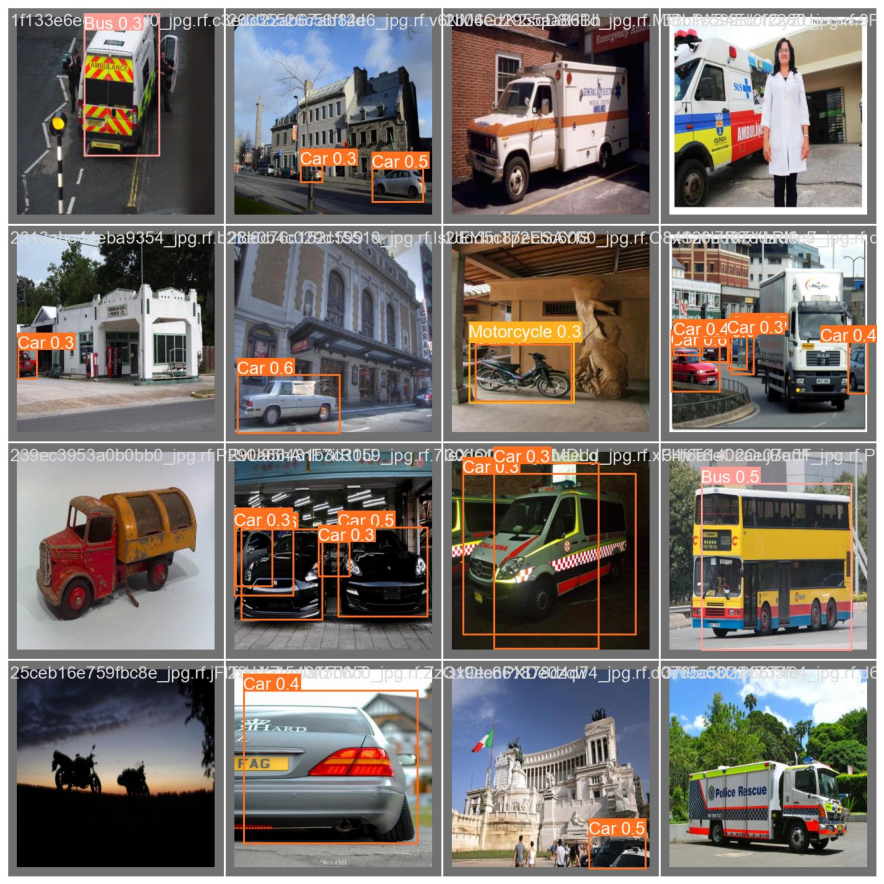

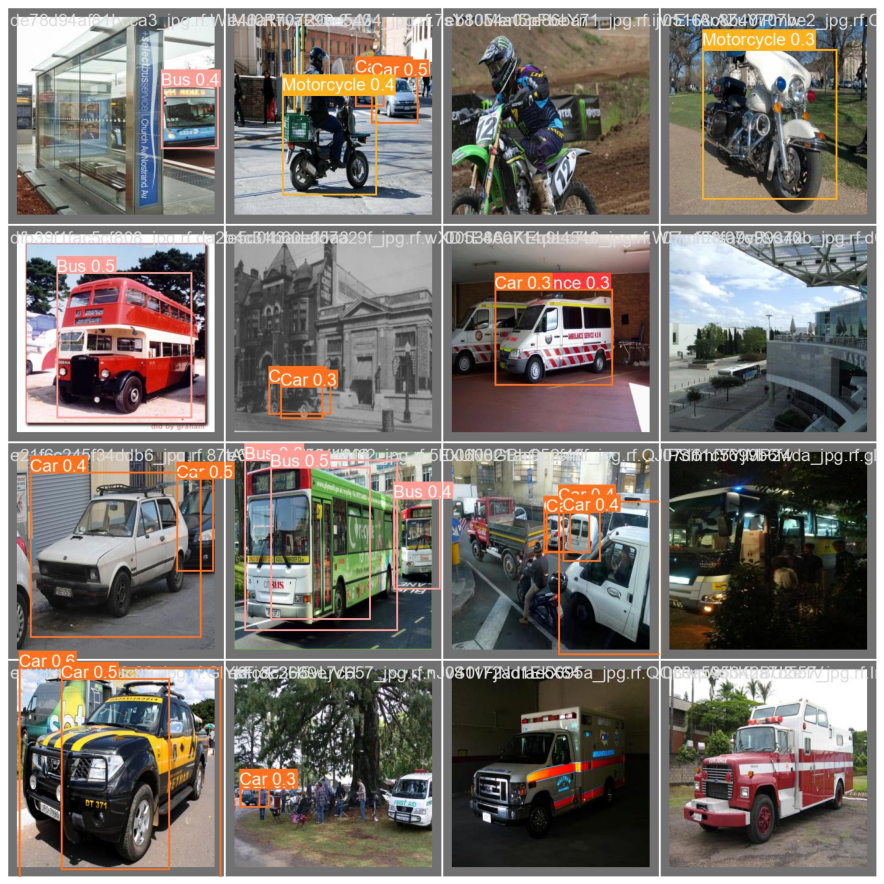

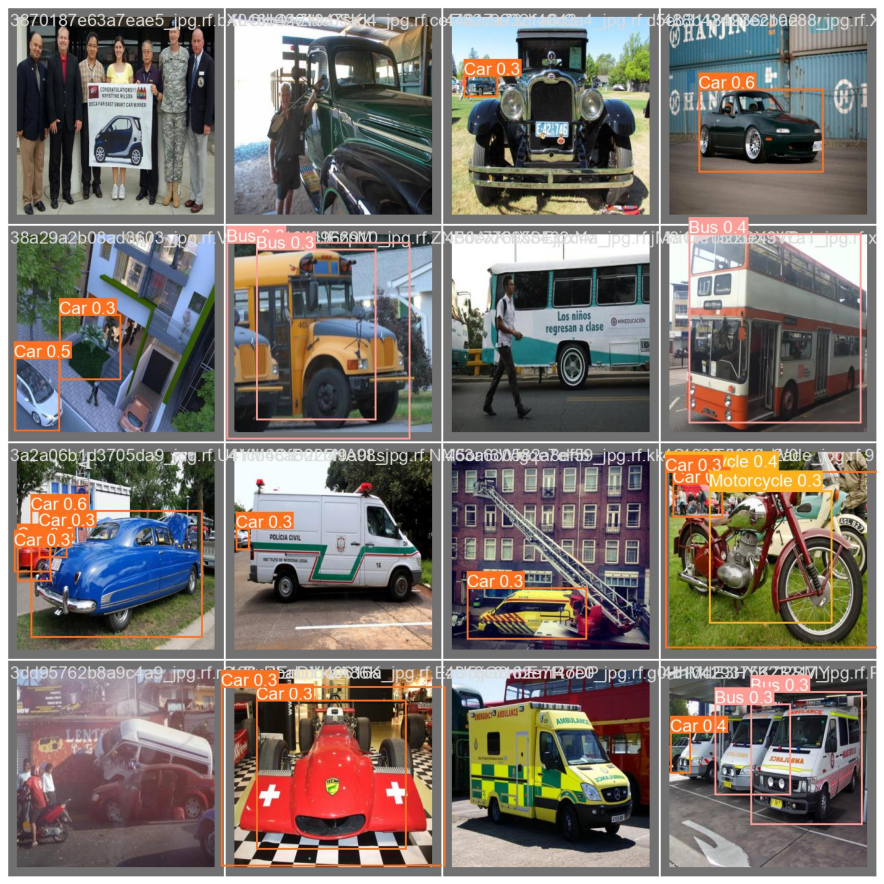

In [ ]:
show_valid_results(RES_DIR)

**Observations:**

The code defines a function that retrieves inference images from a specified directory. It loads and visualizes each image using OpenCV and Matplotlib, respectively, and displays them.

#### Download the inference data file
- If the **inference_images** directory doesn't exist, extract the contents of the **inference_data.zip** file.
- Else, print a message indicating that the dataset is already present.


In [ ]:
download_file('https://learnopencv.s3.us-west-2.amazonaws.com/yolov5_inference_data.zip',
              'inference_data.zip')
if not os.path.exists('inference_images'):
    !unzip -q "inference_data.zip"
else:
    print('Dataset already present')

#### Inference on images
- Call the **inference** function with the arguments **RES_DIR** and **inference_images**.
- Assign the output to the variable **IMAGE_INFER_DIR**.

In [ ]:
IMAGE_INFER_DIR = inference('results_1', 'inference_images')
print("Results saved in:", IMAGE_INFER_DIR)

Current number of inference detection directories: 0
Output folder name: inference_1


detect: weights=['runs/train/results_1/weights/best.pt'], source=../inference_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=inference_1, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.10.2 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 14913MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/4 /voc/work/inference_images/image_1.jpg: 448x640 2 Buss, 3 Cars, 45.8ms
image 2/4 /voc/work/inference_images/image_2.jpg: 416x640 2 Cars, 46.3ms
image 3/4 /voc/work/inference_images/image_3.jpg: 448x640 1 Bus, 8.7ms
image 4/4 /voc/work/inference_images/image_4.jpg: 480x640 4 Cars, 46.9ms
Spe

Results saved in: /yolov5/runs/detect/inference_1


#### Visualizing the inference results
- Invoke the **visualize** function and pass the variable **IMAGE_INFER_DIR** as an argument.
- The visualize function displays the contents of the directory or file represented by the **IMAGE_INFER_DIR** variable.

In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt

def visualize_inference(infer_dir_path):
    """
    Show all images saved in the YOLOv5 detection output folder.
    infer_dir_path: absolute path returned by inference(), e.g.
                    'yolov5/runs/detect/inference_1'
    """
    # Find all jpg / png images in the folder
    images = sorted(
        glob.glob(f"{infer_dir_path}/*.jpg") +
        glob.glob(f"{infer_dir_path}/*.png")
    )

    if not images:
        print("No images found in", infer_dir_path)
        return

    print(f"Found {len(images)} images. Displaying them:")

    for img_path in images:
        img = cv2.imread(img_path)
        if img is None:
            print(f"Could not read {img_path}")
            continue
        # Convert BGR (OpenCV) to RGB (matplotlib)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.title(os.path.basename(img_path))
        plt.axis("off")
        plt.show()


Found 4 images. Displaying them:


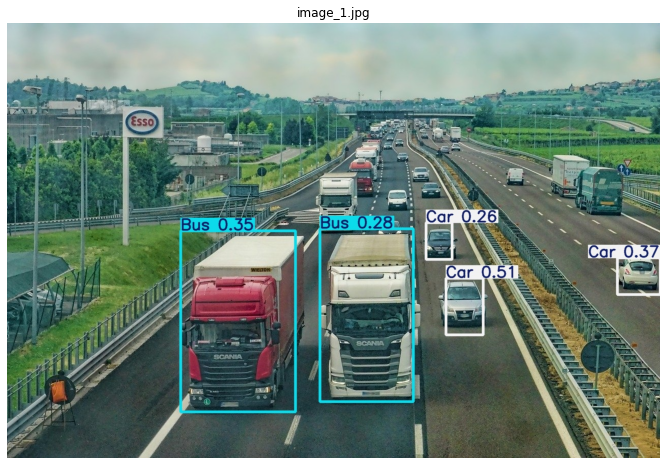

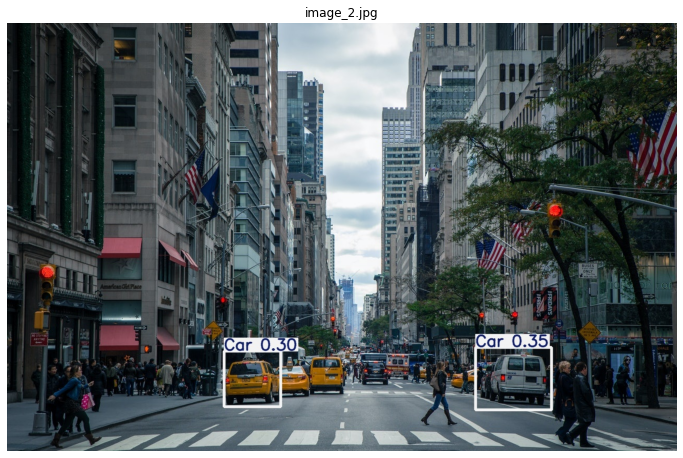

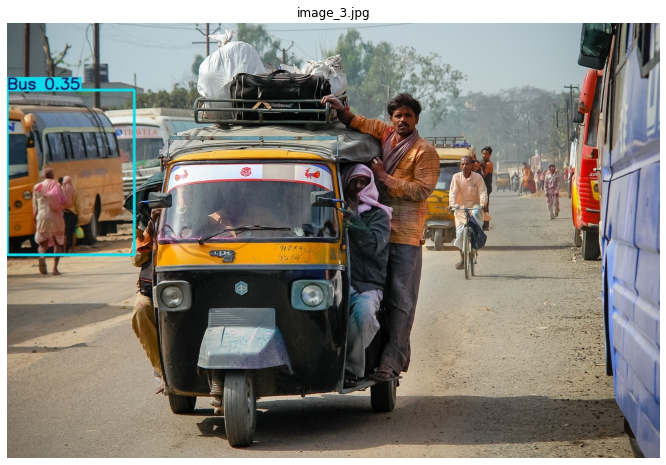

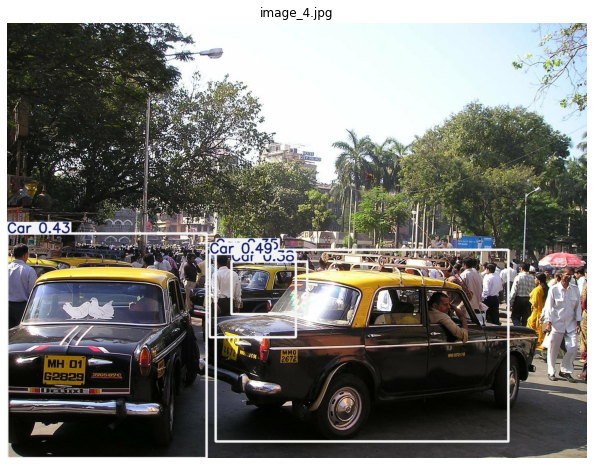

In [ ]:
visualize_inference("yolov5/runs/detect/inference_1")

**Observations:**

 The content associated with the directory or file is displayed.